In [1]:
import pandas as pd

data = {'A': [1, 2, 2, 4], 'B': ['x', 'y', 'y', 'z'], 'C': [1, 2, 2, 4]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Detect duplicate rows
duplicates = df.duplicated()
print("\nDuplicate rows:")
print(duplicates)

# Remove duplicate rows
# You can use the drop_duplicates() method to remove duplicate rows from a DataFrame.
df_no_duplicates = df.drop_duplicates()
print("\nDataFrame after removing duplicate rows:")
print(df_no_duplicates)

# Detecting Duplicate Columns
# To find duplicate columns, you can transpose the DataFrame and then use the duplicated() method. 
# The transpose (.T) switches rows and columns, allowing you to check for duplicated columns as if they were rows.

# Detect duplicate columns
duplicate_columns = df.T.duplicated()
print("\nDuplicate columns:")
print(duplicate_columns)

# Remove duplicate columns
df_no_duplicate_columns = df.T.drop_duplicates()
print("\nDataFrame after removing duplicate columns:")
print(df_no_duplicate_columns)


Original DataFrame:
   A  B  C
0  1  x  1
1  2  y  2
2  2  y  2
3  4  z  4

Duplicate rows:
0    False
1    False
2     True
3    False
dtype: bool

DataFrame after removing duplicate rows:
   A  B  C
0  1  x  1
1  2  y  2
3  4  z  4

Duplicate columns:
A    False
B    False
C     True
dtype: bool

DataFrame after removing duplicate columns:
   0  1  2  3
A  1  2  2  4
B  x  y  y  z


In [2]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'Name': ['John', 'John', 'Mary', 'Peter', 'John'],
    'Age': [25, 25, 30, 35, 25],
    'City': ['New York', 'Chicago', 'Los Angeles', 'Houston', 'Chicago']
})

# remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

# print dataframe after removing duplicate rows
print(df)

    Name  Age         City
0   John   25     New York
1   John   25      Chicago
2   Mary   30  Los Angeles
3  Peter   35      Houston


In [3]:
import numpy as np
import pandas as pd

# Example data
data = {'values': [1, 10, 100, 1000, 10000]}
df = pd.DataFrame(data)

# Applying log transformation
df['log_values'] = np.log(df['values'])

print(df)


   values  log_values
0       1    0.000000
1      10    2.302585
2     100    4.605170
3    1000    6.907755
4   10000    9.210340


Optimal lambda for Box-Cox transformation: 0.721964073
   values  boxcox_values
0       1       0.000000
1       2       0.899527
2       3       1.676492
3       4       2.383230
4       5       3.041952


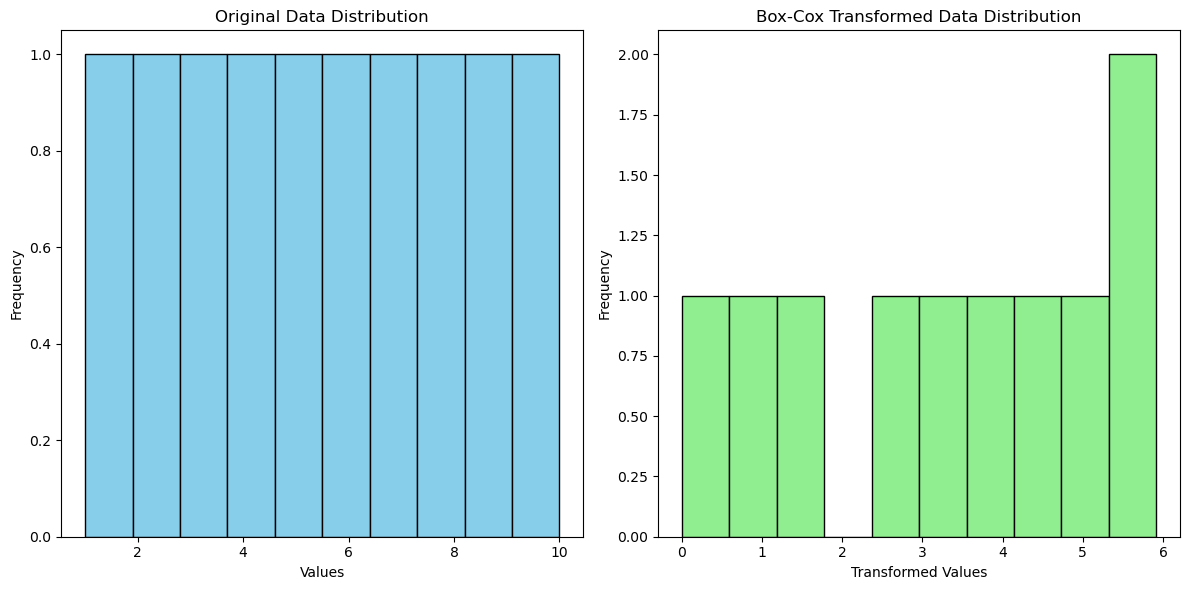

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Generate some example data
data = {
    'values': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
}

# Create a DataFrame
df = pd.DataFrame(data)

# Applying the Box-Cox transformation
# The stats.boxcox function automatically finds the best lambda for the transformation
transformed_data, optimal_lambda = stats.boxcox(df['values'])

# Adding the transformed data to the DataFrame
df['boxcox_values'] = transformed_data

# Output the optimal lambda value and the first few rows of the DataFrame to verify
print(f"Optimal lambda for Box-Cox transformation: {optimal_lambda:.4f}")
print(df.head())

# Visualization: Compare the original and transformed distributions
plt.figure(figsize=(12, 6))

# Original Data Distribution
plt.subplot(1, 2, 1)
plt.hist(df['values'], bins=10, color='skyblue', edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Transformed Data Distribution
plt.subplot(1, 2, 2)
plt.hist(df['boxcox_values'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Box-Cox Transformed Data Distribution')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


Optimal lambda value: 0.7219640728650736
   values  boxcox_values
0       1       0.000000
1       2       0.899527
2       3       1.676492
3       4       2.383230
4       5       3.041952
5       6       3.664777
6       7       4.259251
7       8       4.830488
8       9       5.382155
9      10       5.917001


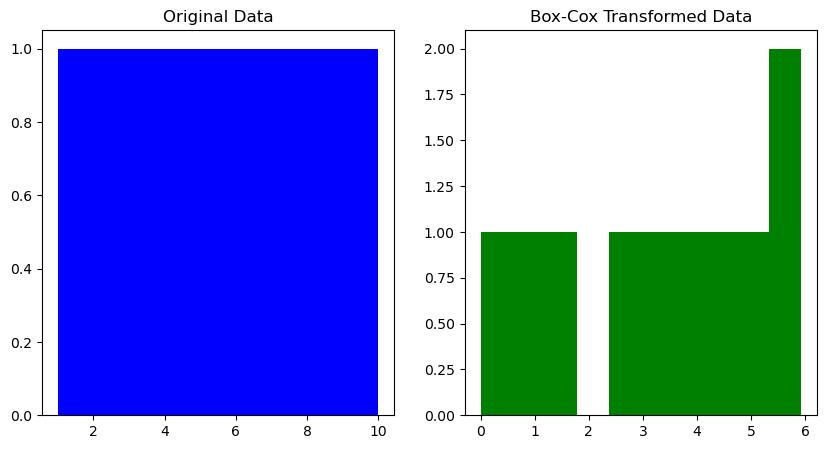

In [8]:
#Box cox transformation

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Example data
data = {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Dataset is stored in Pandas dataframe
df = pd.DataFrame(data)

# Apply Box-Cox transformation using stats.boxcox 
#Transformed data is then added to the dataframe in a new column names boxcox_values
df['boxcox_values'], lambda_value = stats.boxcox(df['values'])

print("Optimal lambda value:", lambda_value)
print(df)

# Plotting original vs transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['values'], bins=10, color='blue')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(df['boxcox_values'], bins=10, color='green')
plt.title('Box-Cox Transformed Data')

plt.show()


In [9]:
#Z-score normalization
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset (assuming it is available in seaborn)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Drop missing values for simplicity
titanic.dropna(subset=['age'], inplace=True)

# Z-score normalization of the 'age' column
scaler = StandardScaler()
titanic['age_zscore'] = scaler.fit_transform(titanic[['age']])

# Display the first few rows
print(titanic[['age', 'age_zscore']].head())


    age  age_zscore
0  22.0   -0.530377
1  38.0    0.571831
2  26.0   -0.254825
3  35.0    0.365167
4  35.0    0.365167


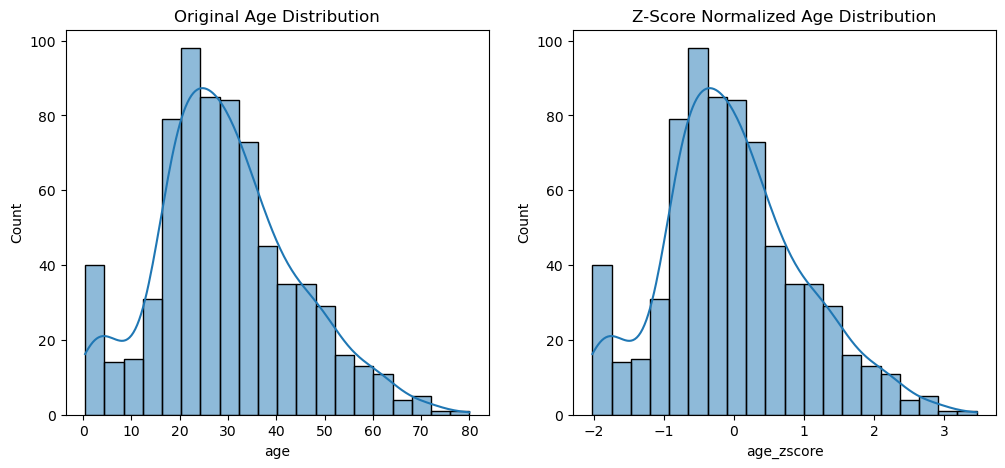

In [15]:
# visualizing the distribution of the original ages and the Z-scores 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'age' and 'age_zscore' columns exist in the DataFrame 'titanic'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(titanic['age'], kde=True)
plt.title('Original Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(titanic['age_zscore'], kde=True)
plt.title('Z-Score Normalized Age Distribution')

plt.show()

#In the second plot (age_zscore), you should see a distribution centered around 0 with a standard deviation of 1, confirming that the data has been standardized.


In [12]:
# decimal scaling normalization
import pandas as pd
import numpy as np

# Load the Iris dataset (assuming it is available in seaborn)
iris = sns.load_dataset('iris')

# Find the maximum absolute value in the sepal_length column
max_val = np.max(np.abs(iris['sepal_length']))

# Calculate j (the smallest integer such that max(|x'|) < 1)
j = np.ceil(np.log10(max_val))

# Apply decimal scaling normalization
iris['sepal_length_scaled'] = iris['sepal_length'] / (10**j)

# Display the first few rows
print(iris[['sepal_length', 'sepal_length_scaled']].head())


   sepal_length  sepal_length_scaled
0           5.1                 0.51
1           4.9                 0.49
2           4.7                 0.47
3           4.6                 0.46
4           5.0                 0.50


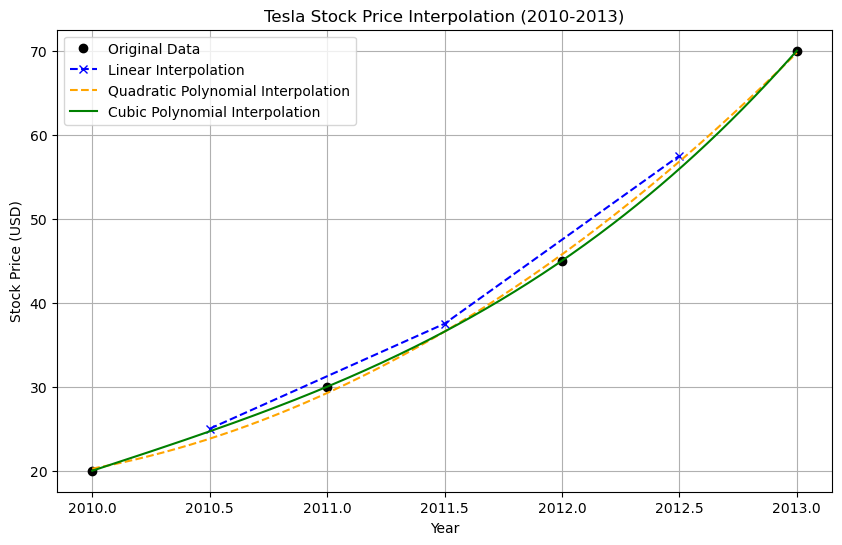

Linear Interpolation - Estimated price for 2010.5: $25.00
Quadratic Interpolation - Estimated price for 2010.5: $23.81
Cubic Interpolation - Estimated price for 2010.5: $24.69
Linear Interpolation - Estimated price for 2011.5: $37.50
Quadratic Interpolation - Estimated price for 2011.5: $36.56
Cubic Interpolation - Estimated price for 2011.5: $36.56
Linear Interpolation - Estimated price for 2012.5: $57.50
Quadratic Interpolation - Estimated price for 2012.5: $56.81
Cubic Interpolation - Estimated price for 2012.5: $55.94


In [14]:
# Linear and Polynomial Interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.polynomial import Polynomial

# Hypothetical stock prices for Tesla (2010-2013)
years = np.array([2010, 2011, 2012, 2013])
prices = np.array([20, 30, 45, 70])

# Points where we want to interpolate (e.g., mid-year points)
interpolation_points = np.array([2010.5, 2011.5, 2012.5])

# Linear Interpolation
linear_interp = interp1d(years, prices, kind='linear')

# Polynomial Interpolation using Polynomial fitting
# Fitting a 2nd degree (quadratic) polynomial
quadratic_poly = Polynomial.fit(years, prices, 2)



# Fitting a 3rd degree (cubic) polynomial
cubic_poly = Polynomial.fit(years, prices, 3)

# Generate values for the interpolated points
linear_prices = linear_interp(interpolation_points)
quadratic_prices = quadratic_poly(interpolation_points)
cubic_prices = cubic_poly(interpolation_points)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot original data points
plt.plot(years, prices, 'o', label='Original Data', color='black')

# Plot linear interpolation
plt.plot(interpolation_points, linear_prices, 'x--', label='Linear Interpolation', color='blue')

# Plot quadratic polynomial interpolation
x_new = np.linspace(2010, 2013, 300)
plt.plot(x_new, quadratic_poly(x_new), '--', label='Quadratic Polynomial Interpolation', color='orange')

# Plot cubic polynomial interpolation
plt.plot(x_new, cubic_poly(x_new), '-', label='Cubic Polynomial Interpolation', color='green')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price Interpolation (2010-2013)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Output the interpolated values
for i, year in enumerate(interpolation_points):
    print(f"Linear Interpolation - Estimated price for {year}: ${linear_prices[i]:.2f}")
    print(f"Quadratic Interpolation - Estimated price for {year}: ${quadratic_prices[i]:.2f}")
    print(f"Cubic Interpolation - Estimated price for {year}: ${cubic_prices[i]:.2f}")


In [2]:
import pandas as pd

# Define the multi-level index
arrays = [
    ['A', 'A', 'B', 'B'],
    ['X', 'Y', 'X', 'Y']
]
multi_index = pd.MultiIndex.from_arrays(arrays, names=('Level1', 'Level2'))

# Create a DataFrame with MultiIndex
data = {'Value': [10, 20, 30, 40]}
df = pd.DataFrame(data, index=multi_index)
print(df)




               Value
Level1 Level2       
A      X          10
       Y          20
B      X          30
       Y          40


In [3]:
df.loc[('A','X')]

Value    10
Name: (A, X), dtype: int64

In [5]:
df.xs('X', level='Level2')

,Value
Level1,
A,10
B,30


In [6]:
import pandas as pd
import timeit

# Create a sample DataFrame
data = {'col1': range(1000), 'col2': range(1000)}
df = pd.DataFrame(data)

# Define functions for each operation
def op_a():
    return df[:100]

def op_b():
    return df.iloc[:100].copy()

def op_c():
    return df.loc[:100].copy()

def op_d():
    return df.take(range(100))

# Measure time for each operation using timeit
print("Time for df[:100]:", timeit.timeit(op_a, number=100) / 100)
print("Time for df.iloc[:100].copy():", timeit.timeit(op_b, number=100) / 100)
print("Time for df.loc[:100].copy():", timeit.timeit(op_c, number=100) / 100)
print("Time for df.take(range(100)):", timeit.timeit(op_d, number=100) / 100)


Time for df[:100]: 6.169374999444699e-05
Time for df.iloc[:100].copy(): 8.07824199910101e-05
Time for df.loc[:100].copy(): 0.00011799763000453822
Time for df.take(range(100)): 0.00021109532000991747


In [9]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Apply a function to calculate the sum of each column
print(df)
print(" c ")
result = df.apply(lambda x: x.sum())
print(result)


   A  B
0  1  4
1  2  5
2  3  6
 c 
A     6
B    15
dtype: int64


In [12]:
result = df.apply(lambda x: x.sum())
result


A     6
B    15
dtype: int64

In [17]:
result = df.applymap(lambda x: x**2)
result

/tmp/ipykernel_16313/1294313711.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result = df.applymap(lambda x: x**2)


,A,B
0,1,16
1,4,25
2,9,36


In [19]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})  
print(df)
result = df.groupby('A').agg({'B': lambda x: x.sum(), 'A': lambda x: x.mean()}) 
print(result) 


   A  B
0  1  4
1  2  5
2  3  6
   B    A
A        
1  4  1.0
2  5  2.0
3  6  3.0


In [20]:
data = {
    'row1': {'col1': 1, 'col2': 2},
    'row2': {'col1': 3, 'col2': 4}
}

df = pd.DataFrame(data)
print(df)

      row1  row2
col1     1     3
col2     2     4


In [21]:
pd.Series([1, 2], index= ['a', 'b', 'c']) 


ValueError: Length of values (2) does not match length of index (3)

In [22]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])  
print(s['f']) 

KeyError: 'f'

In [23]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
}, index=['row1', 'row2', 'row3'])

In [24]:
df

,A,B
row1,1,4
row2,2,5
row3,3,6


In [26]:
value = df.at['row2', 'A']
value

np.int64(2)

In [28]:
df.at['row3', 'B'] = 10
df


,A,B
row1,1,4
row2,2,5
row3,3,10


In [29]:
row = df.loc['row2']
row

A    2
B    5
Name: row2, dtype: int64

In [30]:
subset = df.loc[['row1', 'row3'], 'A']
subset

row1    1
row3    3
Name: A, dtype: int64

In [31]:
subset = df.loc['row1':'row2', 'A':'B']
subset

,A,B
row1,1,4
row2,2,5


In [33]:
df.loc[['row1', 'row3'], 'B'] = [7, 8]
df


,A,B
row1,1,7
row2,2,5
row3,3,8


In [35]:
value = df.iloc[2, 1]
value

np.int64(8)

In [36]:
subset = df.iloc[0:2, 0:2]
subset

,A,B
row1,1,7
row2,2,5
